## Evaluation of supervised regression models

In [2]:
# Import the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model

We will use the same data as in the lecture.

In [3]:
data = pd.DataFrame(data=[[54.17, 57.5, 75.83, 86.67, 44.17, 75, 60, 60.83, 68.33, 73.33, 70, 65, 63.33, 32.5, 68.33, 73.33, 61.67, 70.83, 68.33, 68.33, 58.33, 74.17, 69.17, 91.67, 60.83, 70, 81.67, 76.67, 77.5],
[65, 80, 92, 94, 85, 86, 80, 70, 61, 85, 87, 75, 78, 80, 87, 83, 71, 86, 69, 86, 75, 84, 91, 88, 84, 85, 90, 80, 80]]).T
data.columns = ["#entrance", "final"]
data

,#entrance,final
0,54.17,65.0
1,57.50,80.0
2,75.83,92.0
3,86.67,94.0
4,44.17,85.0
5,75.00,86.0
6,60.00,80.0
7,60.83,70.0
8,68.33,61.0
9,73.33,85.0


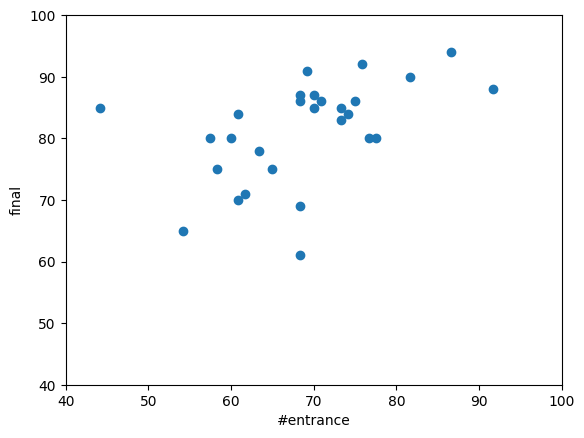

In [4]:
plt.scatter(data['#entrance'], data['final'])
plt.xlim(40, 100)
plt.ylim(40, 100)
plt.xlabel("#entrance")
plt.ylabel("final")
plt.show()

If there is any statistic that normally takes precedence over the others, it is the **root mean squared error (RMSE)**, which is the square root of the mean squared error.

$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (t_i - \mathbb{M}(x_i))^2}$


where $\mathbb{M}(x_i)$ is the predicted or estimated value and $t_i$ is the true target value. Finally the N represents the number of non-missing data points.

The function that calculates the RMSE is (note that for simplicity, we denote the true target value as y_true and and the predicted value as y_pred):

In [5]:
def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

In [6]:
rmse(data['#entrance'], data['final'])

17.66189830465961

### Question
How good is this value? Can we judge the quality of the model by simply using that number?

TPS: Think about it, talk to you partner, discuss in the group!
<br></br>

<details>
    <summary>Click once on <font color="red"><b>this text</b></font> to hide/unhide the answer!</summary>
  
  # Answer removed for preview
</details>

The **mean absolute error (MAE)** is also measured in the same units as the data, and is usually similar in magnitude to, but slightly smaller than, the root mean squared error.  It is less sensitive to the occasional very large error because it does not square the errors in the calculation.

$$ MAE = \frac{1}{N} \sum_{i=1}^{N}   |t_i - \mathbb{M}(x_i)|$$

In [7]:
def mae(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

In [8]:
mae(data['#entrance'], data['final'])

14.534827586206896

The **Pearson’s correlation coefficient** is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is perfect positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

The formula for $\rho$ is:

$$\rho_{t,\mathbb{M}(x)} = \frac{cov(t,\mathbb{M}(x))}{\sigma _{t}\sigma _{\mathbb{M}(x)}} = \frac{\sum_{i=1}^N (t_i - \bar{t})(\mathbb{M}(x_i) - \bar{\mathbb{M}}(x))}{\sqrt{\sum_{i=1}^N (t_i - \bar{t})^2}\sqrt{\sum_{i=1}^N (\mathbb{M}(x_i) - \bar{\mathbb{M}}(x))^2}}$$

where:

* $\rho$ is the Pearson correlation coefficient
* $cov$ is the covarianve
* $\bar{\mathbb{M}}(x)$ is the mean of $\mathbb{M}(x))$
* $\bar{t}$ is the mean of $t$
* $\sigma _{t}$ is the standard deviation of t
* $\sigma _{\mathbb{M}(x)}$  is the standard deviation of $\mathbb{M}(x)$
* $N$ is the number of data points


### Question:

TPS

In the following code, we added three mistakes. Can you spot them?

With "three mistakes", we mean three different kinds of mistakes. When we added the same mistake multiple times, it is counted as one mistake.

In [9]:
def pearson_corr(y_true, y_pred):
    n = len(y_true)
    mean_y_true = sum(y_true) / n
    mean_y_pred = sum(y_pred) / n
    cov = sum((y_true[i] - mean_y_true) + (y_pred[i] - mean_y_true) for i in range(1, n))/n
    std_y_true = (sum((y_true[i] - mean_y_true) ** 2 for i in range(1, n)) / n) ** 0.5
    std_y_pred = (sum((y_pred[i] - mean_y_pred) ** 2 for i in range(1, n)) / n) ** 0.5
    return cov / (std_y_true * std_y_pred)

### Solution

In [10]:
# Answer removed for preview

In [11]:
pearson_corr(data['final'], data['#entrance'])

-0.14625467854168991

Alternatively, you can use the **numpy** package:

In [12]:
np.corrcoef(data['#entrance'], data['final'])

array([[1.        , 0.41531248],
       [0.41531248, 1.        ]])

**R-squared** is the “percent of variance explained” by the model.  That is, R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable.  (The latter number would be the error variance for a constant-only model, which merely predicts that every observation will equal the sample mean.)  It is called R-squared because in a simple regression model it is just the square of the correlation between the dependent and independent variables, which is commonly denoted by “r”. 

If $\bar{t}$ is the mean of the observed data:

$$ \bar{t} = \frac{1}{n}\sum_{i=1}^{N}t_i $$

then the variability of the data set can be measured using the following **sum of squares** formulas:

* The sum of squares of errors, also called the residual sum of squares:

$$ SS_{err} = \sum_{i}^{N}(t_i- \mathbb{M}(x_i))^2 $$

* The total sum of squares (proportional to the variable of the data):

$$ SS_{tot} = \sum_{i}^{N}(t_i-\bar{t})^2 $$

And the general definition of the coefficient of determination is:

$$ R^2 \equiv 1 - \frac{SS_{err}}{SS_{tot}} $$

An **R-squared** of 1 indicates that the model perfectly fits the data.

### Question:

In the following code, we added two mistakes. Can you spot them?

(Hint: the max function is not the mistake, we define the R-squared to be between 0 and 1.)

In [13]:
def r2(y_pred, y_true):
    return max(0, 1 - np.sum((y_true-y_pred)*2) / np.sum((y_true - np.mean(y_pred))*2))

### Solution:

In [14]:
# Answer removed for preview

In [15]:
r2(data['#entrance'], data['final'])

0

### Question
Hmm, interesting, the **Pearson correlation coefficient is 0.42, but the R-Squared is 0**! Did we do a mistake in the implementation? Or is the value true? 

TPS: Think about it, talk to you partner, discuss in the group!
<br></br>

<details>
    <summary>Click once on <font color="red"><b>this text</b></font> to hide/unhide the answer!</summary>
  
  # Answer removed for preview
</details>


Last, we will have a look at the **spearman rank coefficient**.

In [16]:
from scipy.stats import spearmanr

In [17]:
data_ordered = data.sort_values(by="#entrance")
data_ordered['rank #entrance'] = np.arange(len(data)) # get ranks for #entrance, which is simple as we ordered by this column in the step before
data_ordered['rank final'] = data_ordered['final'].rank().astype(int) # get ranks for final
data_ordered['diff'] = data_ordered['rank #entrance'] - data_ordered['rank final'] #get the difference between the ranks
data_ordered['diff_squared'] = data_ordered['diff']**2 #square them
data_ordered

,#entrance,final,rank #entrance,rank final,diff,diff_squared
13,32.50,80.0,0,11,-11,121
4,44.17,85.0,1,18,-17,289
0,54.17,65.0,2,2,0,0
1,57.50,80.0,3,11,-8,64
20,58.33,75.0,4,6,-2,4
6,60.00,80.0,5,11,-6,36
24,60.83,84.0,6,15,-9,81
7,60.83,70.0,7,4,3,9
16,61.67,71.0,8,5,3,9
12,63.33,78.0,9,8,1,1


We use again the scipy package. Note that in the first cell, we use the dedicated function "spearmanr", but in the second the function "pearson_corr" we used earlier.

In [18]:
spearman_coef, p_value = spearmanr(data_ordered['#entrance'], data_ordered['final'])
print('Spearman coefficient calculated with the function for spearman:', round(spearman_coef, 2))

Spearman coefficient calculated with the function for spearman: 0.58


In [19]:
spearman_coef = pearson_corr(data_ordered['rank #entrance'], data_ordered['rank final'])
print('Spearman coefficient calculated with the function for pearson:', round(spearman_coef, 2))

Spearman coefficient calculated with the function for pearson: 0.03


### Question
Why is it possible to calculate the Spearman coefficient with the functions *spearmanr* **AND** with *pearson_corr*?

TPS: Think about it, talk to you partner, discuss in the group!

Hint: You might want to do a websearch for this one.
<br></br>

<details>
    <summary>Click once on <font color="red"><b>this text</b></font> to hide/unhide the answer!</summary>
  
  # Answer removed for preview
</details>


So, now you can create a function that calculates all this goodness of fit measures, and reuse it as often as you want!

In [20]:
def compute_error(y_true, y_pred, nvariables = 2):
    corr = np.corrcoef(y_pred, y_true)[0,1]
    rho2 = pearson_corr(y_pred, y_true)
    spearman_coef = spearmanr(data_ordered['#entrance'], data_ordered['final'])[0]
    mae = np.mean(np.abs(y_pred - y_true))
    rmse = np.sqrt(np.mean((y_pred - y_true)**2))
    r_squared = max(0, 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return  corr, rho2, spearman_coef, mae, rmse, r_squared

In [21]:
corr, rho2, spearman_coef, mae, rmse, r_squared = compute_error(data['#entrance'], data['final'])

print("Root Mean Squared Error = ", rmse)
print("Mean Absolute Error = ", mae)
print("R-squared = ", r_squared)
print("Pearson’s correlation coefficient = ", rho2)
print("Spearman's correlation coefficient = ", spearman_coef)

Root Mean Squared Error =  17.66189830465961
Mean Absolute Error =  14.534827586206896
R-squared =  0
Pearson’s correlation coefficient =  -0.14625467854168991
Spearman's correlation coefficient =  0.5830871342760287
